In [4]:
import csv
import pandas as pd 
import re
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

def Pre_str_to_float(data):
  for i in range(len(data)):
    data[i]=float(data[i])
  return data

def Pre_process(data, col_name, func_name):
  data_transformed=func_name(data[col_name])
  data[col_name]=data_transformed
  return data

file=open('./content/loan_train_preprocessed.csv','r')
lines=csv.reader(file)

data=[]
for line in lines:
  data.append(line)
file.close()
data=DataFrame(data[1:len(data)], columns=data[0])

print('Print Data Columns Name:\n', data.columns.tolist())
print('\nPrint Data:\n',data)


pre_float_list=['loan_amnt','funded_amnt']
for i in pre_float_list:
  data=Pre_process(data,i, Pre_str_to_float)

#문자열 바꾸기
data=data.apply(pd.to_numeric)



Print Data Columns Name:
 ['id', 'loan_status', 'term', 'initial_list_status', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'sub_grade', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'recoveries', 'collection_recovery_fee', 'tot_cur_bal', 'total_rev_hi_lim', 'home_ownershipRENT', 'home_ownershipMORTGAGE', 'home_ownershipOTHER', 'home_ownershipOWN', 'home_ownershipNONE', 'purposedebt_consolidation', 'purposecredit_card', 'purposehome_improvement', 'purposesmall_business', 'purposeother', 'purposemajor_purchase', 'purposewedding', 'purposecar', 'purposehouse', 'purposemoving', 'purposemedical', 'purposerenewable_energy', 'purposevacation', 'purposeeducational', 'earliest_cr_line2010', 'earliest_cr_line1990', 'earliest_cr_line2000', 'earliest_cr_line1970', 'earliest_cr_line1980', 'earliest_cr_line1960', 'earliest_cr_line1950']

Print Data:
       

In [5]:
print('  데이터 내용 미리보기:')
print(data.head())

print('\n   데이터프레임 구조 보기:')
print(data.info())

  데이터 내용 미리보기:
   id  loan_status  term  initial_list_status  loan_amnt  funded_amnt  \
0   1            0     0                    1      0.037        0.039   
1   2            0     1                    1      0.630        0.633   
2   3            0     0                    1     -0.557       -0.555   
3   4            0     1                    0     -0.319       -0.317   
4   5            0     1                    1      0.630        0.633   

   funded_amnt_inv  int_rate  installment  sub_grade  ...  \
0            0.046     1.199       -0.178     -0.332  ...   
1            0.639     0.978        1.186     -1.357  ...   
2           -0.547     0.537       -0.782     -0.332  ...   
3           -0.310     0.167       -0.094     -0.560  ...   
4            0.639    -1.006        0.830      0.352  ...   

   purposerenewable_energy  purposevacation  purposeeducational  \
0                        0                0                   0   
1                        0                0  

In [6]:
print('행,열 개수:')
print(data.shape)

print('\n기본 정보 확인:')
print(data.describe())

print('\변수간 상관계수:')
print(data.corr())

행,열 개수:
(16000, 52)

기본 정보 확인:
                 id   loan_status          term  initial_list_status  \
count  16000.000000  16000.000000  16000.000000         16000.000000   
mean    8000.500000      0.500000      0.680937             0.394313   
std     4618.946489      0.500016      0.466128             0.488718   
min        1.000000      0.000000      0.000000             0.000000   
25%     4000.750000      0.000000      0.000000             0.000000   
50%     8000.500000      0.500000      1.000000             0.000000   
75%    12000.250000      1.000000      1.000000             1.000000   
max    16000.000000      1.000000      1.000000             1.000000   

          loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  16000.000000  16000.000000     16000.000000  16000.000000   
mean      -0.000014      0.000062        -0.000032     -0.000028   
std        1.000014      1.000037         1.000015      1.000075   
min       -1.624000     -1.624000        -1.7320

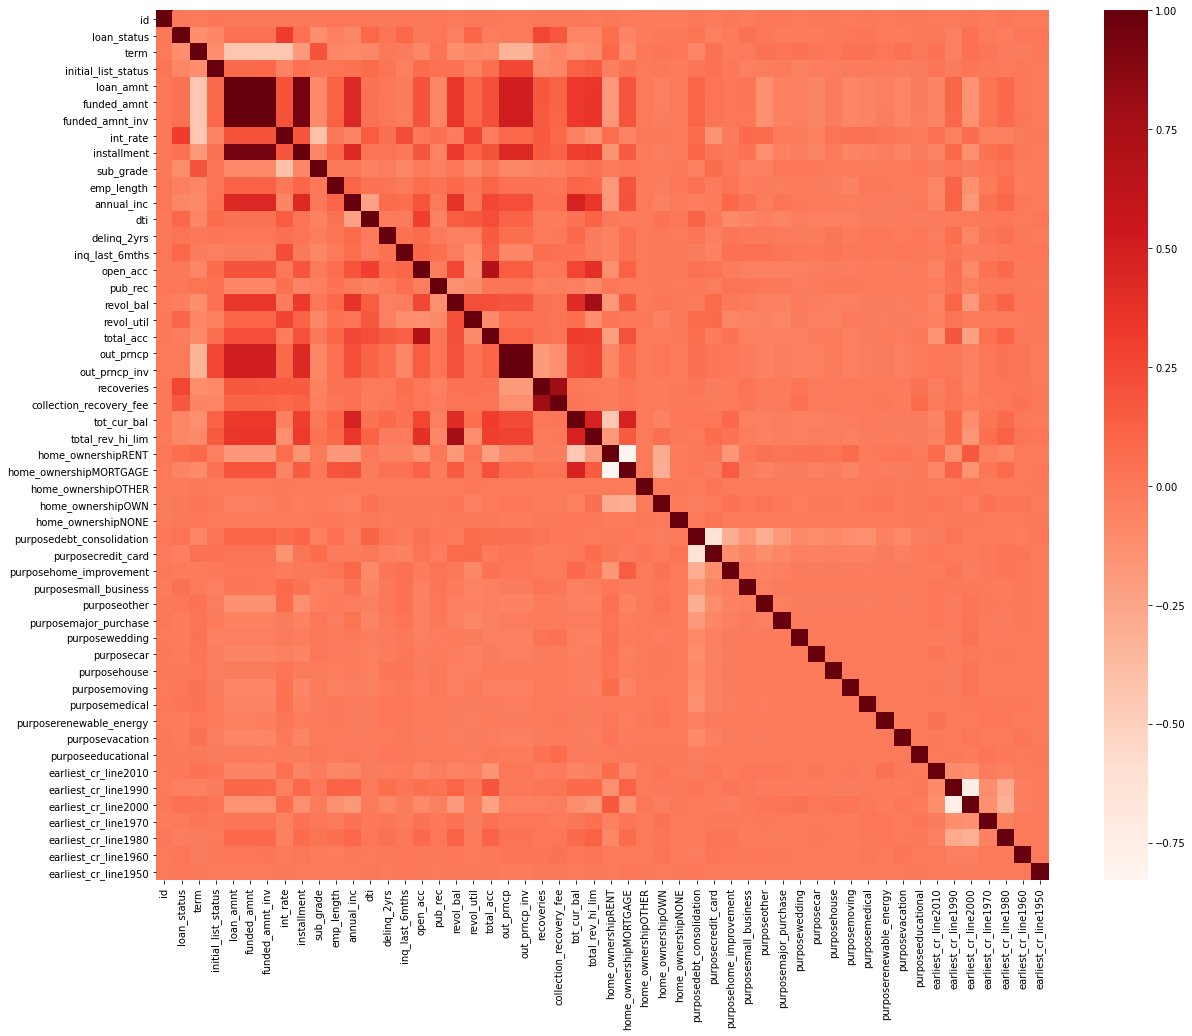

In [7]:
#corr 시각화
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),annot=False,cmap='Reds')
plt.show()

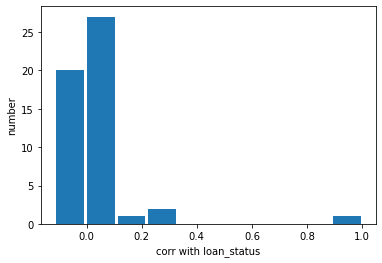


 loan_status    1.000000
int_rate       0.313449
recoveries     0.258617
Name: loan_status, dtype: float64


In [8]:
#y값과 설명변수간의 corr 조사 

corr=data.corr(method='pearson')
corr=corr.iloc[1:,1:]
new_corr=corr.iloc[:,0]
plt.hist(new_corr,rwidth=0.9)
plt.xlabel('corr with loan_status')
plt.ylabel('number')
plt.show()

pick_corr=new_corr[new_corr>0.2]
print('\n',pick_corr)







In [132]:
#설명변수끼리 상관관계 값 큰 것 필터링  보통 0.7기준
s=corr.unstack()
s=s[s>0.5]
s=s[s<0.99]
df=pd.DataFrame(s.sort_values(ascending=False),columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
installment,funded_amnt,0.948754
funded_amnt,installment,0.948754
loan_amnt,installment,0.947319
installment,loan_amnt,0.947319
funded_amnt_inv,installment,0.944949
installment,funded_amnt_inv,0.944949
recoveries,collection_recovery_fee,0.787515
collection_recovery_fee,recoveries,0.787515
total_rev_hi_lim,revol_bal,0.778298
revol_bal,total_rev_hi_lim,0.778298
